In [1]:
import os
import sys
import asyncio
import logging

import numpy as np

from lsst.ts import salobj

import matplotlib.pyplot as plt

from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign

In [2]:
os.environ["LSST_DDS_DOMAIN"] = 'lsatmcs'
os.environ["OSPL_URI"] = "file:///home/tribeiro/ospl.xml"

In [3]:
stream_handler = logging.StreamHandler(sys.stdout)

logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [4]:
cwfs = LatissCWFSAlign(index=3, remotes=True)

In [5]:
await cwfs.start_task

Read historical data in 0.02 sec
Read historical data in 0.36 sec
Read historical data in 1.30 sec
Read historical data in 1.64 sec
Read historical data in 2.54 sec
Read historical data in 2.98 sec
Read historical data in 4.28 sec
Read historical data in 5.07 sec
Read historical data in 6.62 sec
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
Read historical data in 8.23 sec
Read historical data in 11.73 sec
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 11 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 42 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 13 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 45 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) fall

In [6]:
await cwfs.latiss.standby()

[atcamera]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atspectrograph]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atheaderservice]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atarchiver]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
All components in standby.


In [9]:
await cwfs.latiss.enable()

Gathering settings.
No settings for atcamera.
Using  from settingVersions event.
No settings for atspectrograph.
Using current from settingVersions event.
No settings for atheaderservice.
Couldn't get settingVersions event. Using empty settings.
No settings for atarchiver.
Using normal from settingVersions event.
Settings versions: {'atcamera': '', 'atspectrograph': 'current', 'atheaderservice': '', 'atarchiver': 'normal'}
Enabling all components
Enabling  atcamera
Enabling  atspectrograph
Enabling  atheaderservice
Enabling  atarchiver
[atcamera]::[<State.ENABLED: 2>]
[atspectrograph]::[<State.ENABLED: 2>]
[atheaderservice]::[<State.STANDBY: 5>, <State.DISABLED: 1>, <State.ENABLED: 2>]
[atarchiver]::[<State.ENABLED: 2>]
All components enabled.


In [10]:
await salobj.set_summary_state(cwfs.latiss.atheaderservice, salobj.State.OFFLINE)

[<State.ENABLED: 2>,
 <State.DISABLED: 1>,
 <State.STANDBY: 5>,
 <State.OFFLINE: 4>]

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages


In [11]:
await salobj.set_summary_state(cwfs.latiss.atheaderservice, salobj.State.ENABLED)

[<State.STANDBY: 5>, <State.DISABLED: 1>, <State.ENABLED: 2>]

In [ ]:
await cwfs.attcs.atdome.cmd_openShutter.start()

In [ ]:
await cwfs.latiss.take_bias(1)

In [23]:
logger.level = logging.INFO

In [ ]:
# await cwfs.hexapod_offset(+2*cwfs.dz)

In [ ]:
# await cwfs.attcs.ataos.cmd_resetOffset.start()

In [247]:
cwfs.filter = "BG40"
cwfs.grating = "empty_1"

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015954032384 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015954032384 and this is thread id 140023838263104.
Exception ignore

In [17]:
cwfs.intra_visit_id = 2020031600087
cwfs.extra_visit_id = 2020031600088
cwfs.dataPath = "/project/shared/auxTel"
cwfs.angle = 90.
# print(cwfs.camera_rotation_angle)

In [18]:
await cwfs.run_cwfs()

Running cwfs in 2020031600087/2020031600088.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140016307664640 and this is thread id 140015945639680.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140016307664640 and this is thread id 140015945639680.
Exception ignore

RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
Could not get intra focus image from butler. Waiting 5.0s and trying again.
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000087.yaml
AT_O_20200316_000087: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000087: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000087.yaml
AT_O_20200316_000087: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000087: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 15 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015945639680 and this is thread id 140015866738432.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015945639680 and this is thread id 140015866738432.
Exception ignore

Could not get intra focus image from butler. Waiting 5.0s and trying again.
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000088.yaml
AT_O_20200316_000088: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000088: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000088.yaml
AT_O_20200316_000088: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000088: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessa

Measured zernike coeficients: [6.187461719717902, -23.31285601648981, -97.05184957927789]
De-rotated zernike coeficients: [-23.31285602  -6.18746172 -97.05184958]
Hexapod offset: [ 0.17796073 -0.04723253  0.02310758]
Telescope offsets: [10.67764398 -2.83395193  0.        ]

[ -97.05184958   13.81411044 -113.77070585    6.18746172  -23.31285602
  -10.01925255   36.43314449    8.28329299    7.73178736]
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Display' (DejaV

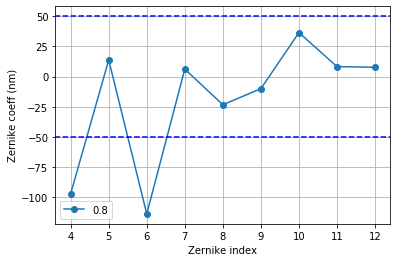

In [19]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [20]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0., z=0.02)

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015866738432 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140016307664640 and this is thread id 140023838263104.
Exception ignore

In [21]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
# cwfs.dataPath = "/project/shared/auxTel"
# cwfs.angle = 90.
# print(cwfs.camera_rotation_angle)

In [22]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600089
extraImage expId for target: 2020031600090


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000089.yaml
AT_O_20200316_000089: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000089: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000089.yaml
AT_O_20200316_000089: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000089: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 35 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 15 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140015841560320.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000090.yaml
AT_O_20200316_000090: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000090: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000090.yaml
AT_O_20200316_000090: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000090: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
Running source detection algorithm
RemoteTelemetry(ATDome, 0, position) falling behind; read 38 messages
RemoteEvent(

Measured zernike coeficients: [-6.259497253965005, -27.509331296887417, -19.44520829260797]
De-rotated zernike coeficients: [-27.39577688   6.73914114 -19.44520829]
Hexapod offset: [0.20912807 0.05144383 0.00462981]
Telescope offsets: [12.54768407  3.08662953  0.        ]

[ -19.44520829   49.25633813 -113.04544243   -6.25949725  -27.5093313
   15.52397438   49.53826195    7.26772311   -2.78054577]


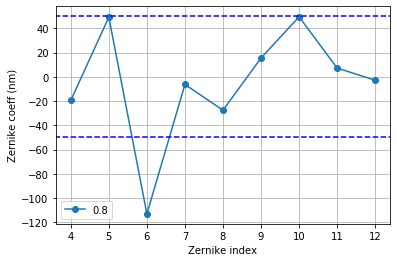

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.


In [24]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [26]:
cwfs.attcs.slew_object?

Signature:
cwfs.attcs.slew_object(
    name,
    rot_sky=None,
    pa_ang=None,
    rot_pa=0.0,
    slew_timeout=240.0,
)
Docstring:
Slew to an object name.

Use simbad to resolve the name and get coordinates.

Parameters
----------
name : `str`
    Target name.
rot_sky : `float` or `str`
    Target sky position angle (deg). Default is `None`, which means
    use `rot_pa`.
pa_ang :  `float` or `str`
    Set rotator so that the reference position is the parallactic
    angle. Meaning, if pa_ang=0. the rot_sky is set so that y-axis
    is aligned with the parallactic angle.
rot_pa : `float` or `str`
    Target rotator position angle (deg). Ignored if `rot_sky` is
    given (Default = 0).
slew_timeout : `float`
    Timeout for the slew command (second).
File:      ~/WORK/ts_standardscripts/python/lsst/ts/standardscripts/auxtel/attcs.py
Type:      method


In [27]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90., )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 19.843897090406223 | Sky Angle: 155.65648818919993
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.021 | delta Az = +000.057 delta N1 = +000.000 delta N2 = +000.646 [Dome] delta Az = +000.231
[Telescope] delta Alt = -000.000 | delta Az = -000.004 delta N1 = -000.000 delta N2 = +000.013 [Dome] delta Az = +000.231
Got True
Waiting for telescope to settle.
[Telescope] delta Alt = +000.000 | delta Az = -000.004 delta N1 = +000.000 delta N2 = +000.013 [Dome] delta Az = +000.231
Telescope in position.
ATDome in position.
['Telescope in position.', 'ATDome in 

In [28]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=+1.0, z=0.02)

In [29]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600092
extraImage expId for target: 2020031600093


In [ ]:
cwfs.intra_visit_id = 2020031600092
cwfs.extra_visit_id = 2020031600093
cwfs.angle = 0.

In [31]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90.-60. )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 21.452642646330165 | Sky Angle: 96.95095287653609
Sending command
Stop tracking.
Mount tracking state is 8
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.024 | delta Az = +000.147 delta N1 = +000.000 delta N2 = -058.885 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.000 | delta Az = -000.003 delta N1 = +000.000 delta N2 = -056.864 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.000 | delta Az = -000.004 delta N1 = -000.000 delta N2 = -052.881 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = -000.000 delta N2 = -046.894 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.000 | delta Az = -000.002 delta

In [32]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600094
extraImage expId for target: 2020031600095


In [ ]:
cwfs.intra_visit_id = 2020031600094
cwfs.extra_visit_id = 2020031600095
cwfs.angle = -60.

In [33]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90.-120. )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 23.40061223113407 | Sky Angle: 38.48077014691995
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.018 | delta Az = +000.054 delta N1 = -000.000 delta N2 = -058.531 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.000 | delta Az = -000.002 delta N1 = -000.000 delta N2 = -056.877 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.000 | delta Az = -000.004 delta N1 = +000.000 delta N2 = -050.923 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.003 delta N1 = -000.000 delta N2 = -046.938 [Dome] delta Az = +000.231
[Te

In [34]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031600096
extraImage expId for target: 2020031600097


In [ ]:
cwfs.intra_visit_id = 2020031600096
cwfs.extra_visit_id = 2020031600097
cwfs.angle = -120.

In [35]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90.-180. )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 24.552574703097665 | Sky Angle: -20.634527290619275
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.011 | delta Az = +000.054 delta N1 = -000.000 delta N2 = -058.919 [Dome] delta Az = +000.231
[Telescope] delta Alt = -000.000 | delta Az = -000.003 delta N1 = -000.000 delta N2 = -053.654 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = +000.000 delta N2 = -047.683 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = -000.000 delta N2 = -041.694 [Dome] delta Az = +000.231


In [36]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600098
extraImage expId for target: 2020031600099


In [ ]:
cwfs.intra_visit_id = 2020031600098
cwfs.extra_visit_id = 2020031600099
cwfs.angle = -180.

In [37]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90.-240. )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 25.74687848585309 | Sky Angle: -79.73307562849747
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.014 | delta Az = +000.054 delta N1 = +000.000 delta N2 = -058.900 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.000 | delta Az = -000.003 delta N1 = -000.000 delta N2 = -053.636 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = -000.000 delta N2 = -047.660 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.003 delta N1 = -000.000 delta N2 = -041.685 [Dome] delta Az = +000.231
[T

In [38]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031600100
extraImage expId for target: 2020031600101


In [ ]:
cwfs.intra_visit_id = 2020031600100
cwfs.extra_visit_id = 2020031600101
cwfs.angle = -240.

In [39]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90. )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 27.079305389097573 | Sky Angle: 161.25317449514154
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.013 | delta Az = +000.053 delta N1 = -000.000 delta N2 = -119.279 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = -000.000 delta N2 = -120.298 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = -000.000 delta N2 = -121.814 [Dome] delta Az = +000.231
[Telescope] delta Alt = +000.001 | delta Az = -000.003 delta N1 = +000.000 delta N2 = -122.893 [Dome] delta Az = +000.231
[

In [44]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90.+45. )

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 29.78530834369345 | Sky Angle: 208.19028618705966
Sending command
Stop tracking.
Mount tracking state is 8
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.030 | delta Az = +000.159 delta N1 = -000.000 delta N2 = +000.016 [Dome] delta Az = +000.256
Got True
Waiting for telescope to settle.
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = +000.000 delta N2 = +000.012 [Dome] delta Az = +000.256
Telescope in position.
ATDome in position.
['Telescope in position.', 'ATDome in position.']


In [45]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600102
extraImage expId for target: 2020031600103


In [ ]:
cwfs.intra_visit_id = 2020031600102
cwfs.extra_visit_id = 2020031600103
cwfs.angle = 45.

In [46]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=-1.0, z=-0.02)

In [47]:
await cwfs.attcs.slew_object("HD 59468", pa_ang=90.)

Slewing to HD 59468: 07 27 25.4644 -51 24 09.358
Parallactic angle: 31.341233642294444 | Sky Angle: 164.2630539758233
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
atdome: <State.ENABLED: 2>
atdometrajectory: <State.ENABLED: 2>
[Telescope] delta Alt = -000.012 | delta Az = +000.046 delta N1 = -000.000 delta N2 = -043.718 [Dome] delta Az = +000.256
[Telescope] delta Alt = +000.001 | delta Az = -000.003 delta N1 = -000.000 delta N2 = -038.455 [Dome] delta Az = +000.256
[Telescope] delta Alt = +000.001 | delta Az = -000.004 delta N1 = +000.000 delta N2 = -032.470 [Dome] delta Az = +000.256
[Telescope] delta Alt = +000.001 | delta Az = -000.003 delta N1 = +000.000 delta N2 = -026.503 [Dome] delta Az = +000.256
[T

In [48]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [49]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600104
extraImage expId for target: 2020031600105


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 14 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000104.yaml
AT_O_20200316_000104: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000104: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000104.yaml
AT_O_20200316_000104: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000104: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
RemoteEvent(ATDomeTrajectory, 0, logMes

/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000105.yaml
AT_O_20200316_000105: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000105: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000105.yaml
AT_O_20200316_000105: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000105: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 18 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
Running source detection algorithm
Remo

Measured zernike coeficients: [20.016732060987785, -4.072013338377767, 9.312728636497546]
De-rotated zernike coeficients: [19.99922703 -4.15713521  9.31272864]
Hexapod offset: [-0.15266586 -0.03173386 -0.00221732]
Telescope offsets: [-9.15995131 -1.90403139  0.        ]

[  9.31272864 -51.36591421  94.37228831  20.01673206  -4.07201334
  67.56646819  -3.998371     4.98428794  -6.5480327 ]


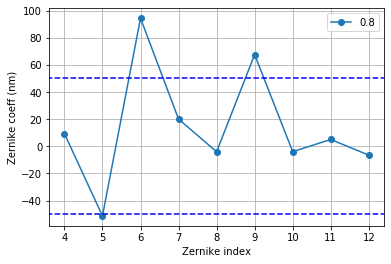

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140016307664640 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140016307664640 and this is thread id 140023838263104.
Exception ignore

In [50]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [51]:
await cwfs.latiss.take_object(20.)

Generating group_id
OBJECT 0001 - 0001


array([2020031600106])

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [52]:
cwfs.evt_logMessage.set_put(message="Focused image: {2020031600106}")

True

In [53]:
cwfs.filter = "RG610"
cwfs.grating = "empty_1"

In [54]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [55]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600107
extraImage expId for target: 2020031600108


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000107.yaml
AT_O_20200316_000107: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000107: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000107.yaml
AT_O_20200316_000107: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000107: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000108.yaml
AT_O_20200316_000108: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000108: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000108.yaml
AT_O_20200316_000108: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000108: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteTelemetry(ATMCS, 0, azEl_mountMotorEncoders) falling behind; 

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015945639680 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015945639680 and this is thread id 140023838263104.
Exception ignore

Measured zernike coeficients: [26.331116120862063, 11.476208331783754, 0.4039487687903978]
De-rotated zernike coeficients: [26.72115867 10.53616216  0.40394877]
Hexapod offset: [-2.03978310e-01  8.04287188e-02 -9.61782783e-05]
Telescope offsets: [-12.23869863   4.82572313   0.        ]



In [56]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600107, 2020031600108, 2.030263271929428


Measured zernike coeficients: [26.331116120862063, 11.476208331783754, 0.4039487687903978]
De-rotated zernike coeficients: [26.72115867 10.53616216  0.40394877]
Hexapod offset: [-2.03978310e-01  8.04287188e-02 -9.61782783e-05]
Telescope offsets: [-12.23869863   4.82572313   0.        ]

[  0.40394877 -40.90540351 151.63840595  26.33111612  11.47620833
  42.36433445 -33.95978831  10.99843785   1.77608705]


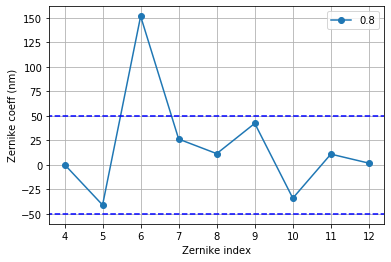

In [57]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bo

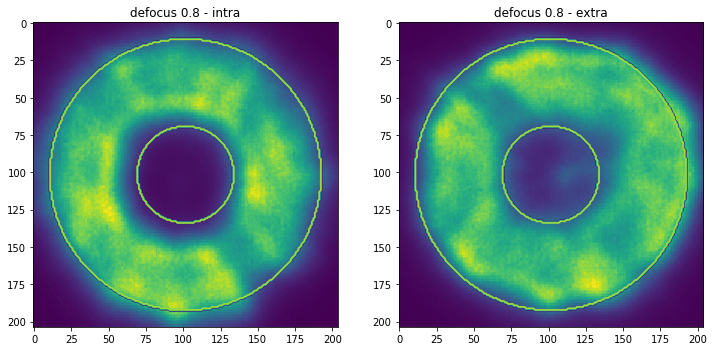

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 15 messages


In [58]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [59]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")

Generating group_id
OBJECT 0001 - 0001


True

In [60]:
cwfs.filter = "quadnotch1"
cwfs.grating = "empty_1"

In [64]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [65]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 14 messages
ENGTEST 0001 - 0001


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015954032384 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015954032384 and this is thread id 140023838263104.
Exception ignore

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031600110
extraImage expId for target: 2020031600111


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000110.yaml
AT_O_20200316_000110: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000110: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000110.yaml
AT_O_20200316_000110: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000110: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 50 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000111.yaml
AT_O_20200316_000111: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000111: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000111.yaml
AT_O_20200316_000111: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000111: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 41 mess

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015833167616 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015833167616 and this is thread id 140023838263104.
Exception ignore

Measured zernike coeficients: [13.439520780781578, 15.178720089825385, -42.916261450992735]
De-rotated zernike coeficients: [ 14.4690795   14.20070424 -42.91626145]
Hexapod offset: [-0.11045099  0.10840232  0.01021816]
Telescope offsets: [-6.62705931  6.50413934  0.        ]



In [66]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600110, 2020031600111, 4.014050053057147


Measured zernike coeficients: [13.439520780781578, 15.178720089825385, -42.916261450992735]
De-rotated zernike coeficients: [ 14.4690795   14.20070424 -42.91626145]
Hexapod offset: [-0.11045099  0.10840232  0.01021816]
Telescope offsets: [-6.62705931  6.50413934  0.        ]

[-42.91626145 -51.2909821  127.14185064  13.43952078  15.17872009
  46.39628326 -12.75172272   6.70780901   2.88704679]


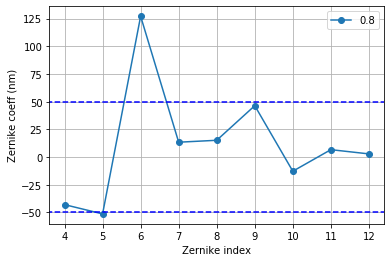

In [67]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

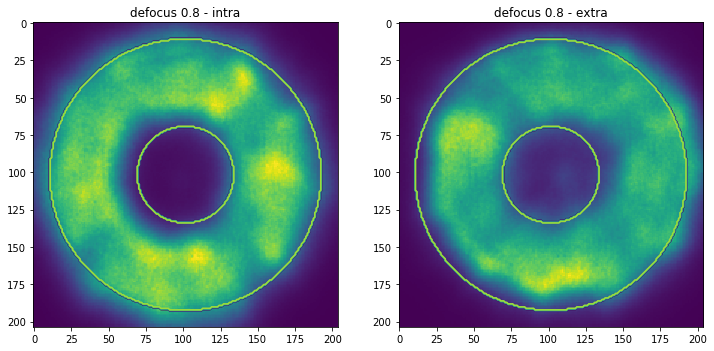

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages


In [68]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [69]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=0.01)

In [70]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [71]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600112
extraImage expId for target: 2020031600113


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000112.yaml
AT_O_20200316_000112: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000112: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000112.yaml
AT_O_20200316_000112: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000112: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000113.yaml
AT_O_20200316_000113: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000113: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000113.yaml
AT_O_20200316_000113: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000113: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 18 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages
Remo

In [72]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600112, 2020031600113, 5.179860030856801


Measured zernike coeficients: [24.62250213554364, 11.17910575366893, 27.401307784726896]
De-rotated zernike coeficients: [25.5312264   8.91047111 27.40130778]
Hexapod offset: [-0.19489486  0.06801886 -0.00652412]
Telescope offsets: [-11.69369148   4.08113181   0.        ]

[ 27.40130778  -8.04542079 164.97532322  24.62250214  11.17910575
  50.71099099 -15.36933834  -1.61376067 -10.82385785]


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignore

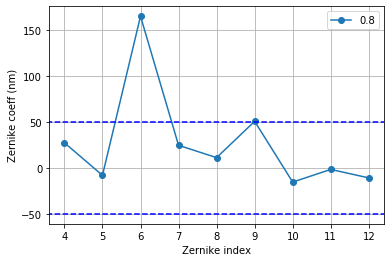

In [73]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

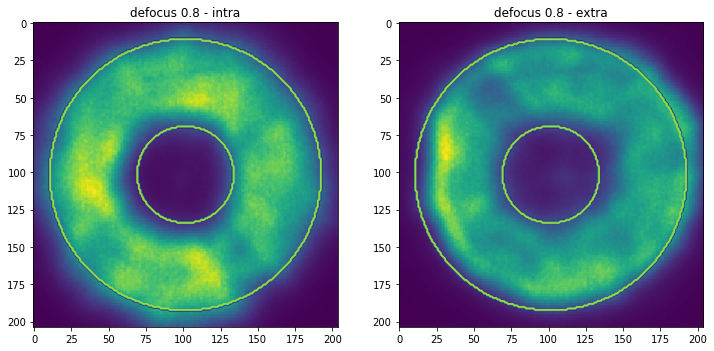

RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages


In [74]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [76]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

Generating group_id
OBJECT 0001 - 0001
[2020031600114]


In [77]:
cwfs.filter = "empty_1"
cwfs.grating = "empty_1"

In [78]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [79]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600115
extraImage expId for target: 2020031600116


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000115.yaml
AT_O_20200316_000115: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000115: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000115.yaml
AT_O_20200316_000115: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000115: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000116.yaml
AT_O_20200316_000116: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000116: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000116.yaml
AT_O_20200316_000116: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000116: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages
Running source detection algorithm
RemoteEvent(ATMCS, 0, target) falling behind; read 57 messages
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 44 messages
RemoteT

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140023838263104.
Exception ignore

Measured zernike coeficients: [38.753563578248865, -22.28333536595508, -30.719867218028007]
De-rotated zernike coeficients: [ 36.00832545 -26.49124806 -30.71986722]
Hexapod offset: [-0.27487271 -0.20222327  0.00731425]
Telescope offsets: [-16.4923628  -12.13339606   0.        ]



In [80]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600115, 2020031600116, 6.442895809557669


Measured zernike coeficients: [38.753563578248865, -22.28333536595508, -30.719867218028007]
De-rotated zernike coeficients: [ 36.00832545 -26.49124806 -30.71986722]
Hexapod offset: [-0.27487271 -0.20222327  0.00731425]
Telescope offsets: [-16.4923628  -12.13339606   0.        ]

[-30.71986722   4.10929849 163.9787071   38.75356358 -22.28333537
  37.34534883 -31.94998736   2.63229761 -10.15825479]


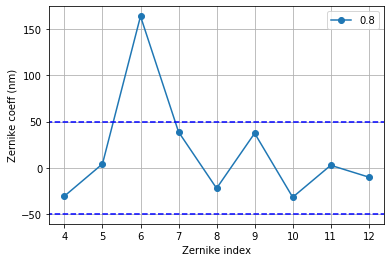

In [81]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

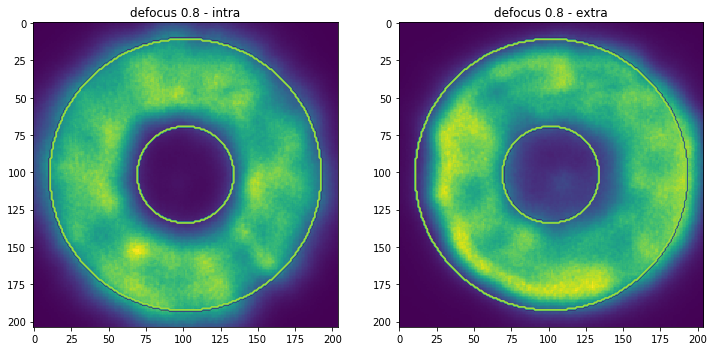

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


In [82]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=0.0)

In [83]:
exp_id = await cwfs.latiss.take_object(20.)

Generating group_id
OBJECT 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages


In [84]:
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

[2020031600117]


In [85]:
cwfs.filter = "empty_1"
cwfs.grating = "ronchi90lpmm"

In [86]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [87]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031600118
extraImage expId for target: 2020031600119


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000118.yaml
AT_O_20200316_000118: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000118: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000118.yaml
AT_O_20200316_000118: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000118: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000119.yaml
AT_O_20200316_000119: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000119: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000119.yaml
AT_O_20200316_000119: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000119: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 23 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 46 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015849953024 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015849953024 and this is thread id 140023838263104.
Exception ignore

RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 58 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 12 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 66 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATDome, 0, heartbeat) falling behind; read 14 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 14 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 13 messages
RemoteEvent(ATPtg, 0, mountDataWarning) falling behind; read 12 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 65 messages
RemoteTelemetry(ATPneumatics, 

In [88]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600118, 2020031600119, 7.781915704162088


Measured zernike coeficients: [8.224960268412376, 1.7143629939542842, 66.80737931862728]
De-rotated zernike coeficients: [ 8.38134319  0.58489168 66.80737932]
Hexapod offset: [-0.06397972  0.00446482 -0.01590652]
Telescope offsets: [-3.83878314  0.26788932  0.        ]

[ 66.80737932  -5.66377629 105.14140413   8.22496027   1.71436299
  46.32273065 -49.55896894   5.54825753 -10.71680349]


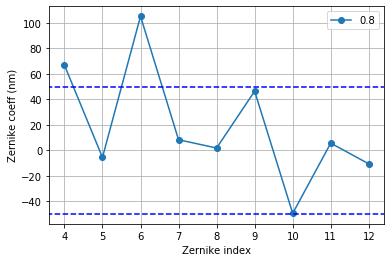

In [89]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

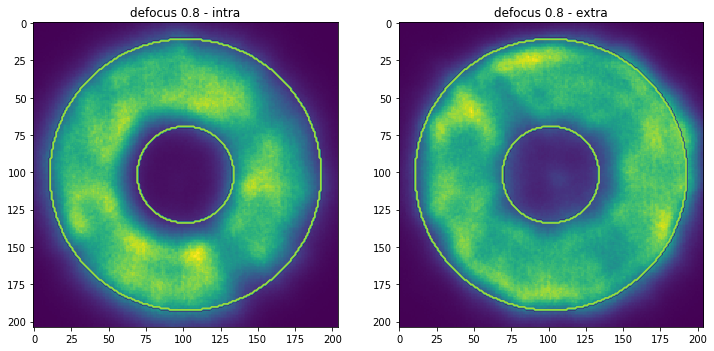

RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages


In [90]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [91]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=-0.016)

In [92]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [93]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031600120
extraImage expId for target: 2020031600121


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000120.yaml
AT_O_20200316_000120: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000120: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000120.yaml
AT_O_20200316_000120: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000120: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000121.yaml
AT_O_20200316_000121: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000121: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000121.yaml
AT_O_20200316_000121: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000121: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 32 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 44 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 11

In [94]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600120, 2020031600121, 8.50622384771588


Measured zernike coeficients: [12.377841338953644, 20.172091128185425, 30.906675285046948]
De-rotated zernike coeficients: [15.22547468 18.1193029  30.90667529]
Hexapod offset: [-0.116225    0.13831529 -0.00735873]
Telescope offsets: [-6.97349985  8.29891736  0.        ]

[ 30.90667529  37.23249287  84.54409236  12.37784134  20.17209113
  22.36289745 -44.95002187  -0.13435124  -1.60364958]


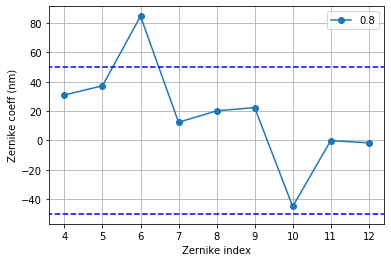

In [95]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

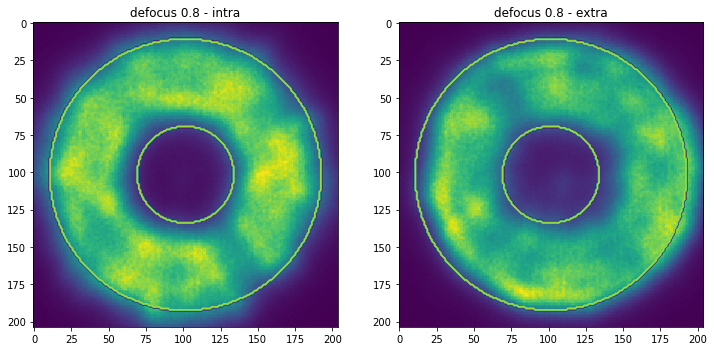

RemoteEvent(ATMCS, 0, target) falling behind; read 18 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 19 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignore

In [96]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [97]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=-0.007)

In [98]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [99]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031600122
extraImage expId for target: 2020031600123


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000122.yaml
AT_O_20200316_000122: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000122: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000122.yaml
AT_O_20200316_000122: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000122: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015833167616 and this is thread id 140015841560320.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015833167616 and this is thread id 140015841560320.


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000123.yaml
AT_O_20200316_000123: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000123: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000123.yaml
AT_O_20200316_000123: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000123: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 35 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 18 messages
Running source detection algorithm
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 45

In [100]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600122, 2020031600123, 9.172221911697996


Measured zernike coeficients: [-4.8060625566283806, 34.232682729319826, -45.309655363614624]
De-rotated zernike coeficients: [  0.71216755  34.5610709  -45.30965536]
Hexapod offset: [-0.00543639  0.26382497  0.01078801]
Telescope offsets: [-0.32618361 15.82949812  0.        ]

[-45.30965536   9.59395287  49.08304519  -4.80606256  34.23268273
  38.21475387 -31.42329979   4.60192647   9.23228579]


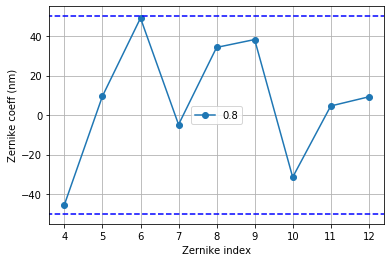

In [101]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

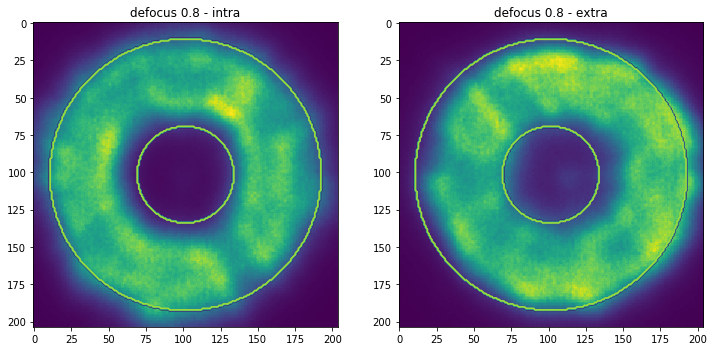

RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages


In [102]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [103]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

Generating group_id
OBJECT 0001 - 0001
[2020031600124]
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages


In [104]:
cwfs.filter = "BG40"
cwfs.grating = "ronchi90lpmm"

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.


In [105]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [106]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600125
extraImage expId for target: 2020031600126


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000125.yaml
AT_O_20200316_000125: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000125: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000125.yaml
AT_O_20200316_000125: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000125: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000126.yaml
AT_O_20200316_000126: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000126: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000126.yaml
AT_O_20200316_000126: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000126: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
Running source detection algorithm
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 10 messages
RemoteEvent

In [107]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600125, 2020031600126, 9.998838467897293


Measured zernike coeficients: [9.01335550270867, 6.080762652062783, 97.65524392941626]
De-rotated zernike coeficients: [ 9.93224606  4.4234308  97.65524393]
Hexapod offset: [-0.07581867  0.03376665 -0.02325125]
Telescope offsets: [-4.54912033  2.02599884  0.        ]

[ 97.65524393  22.09621334 150.86831755   9.0133555    6.08076265
  34.08268531 -41.93976688   2.89617481  -9.26199017]


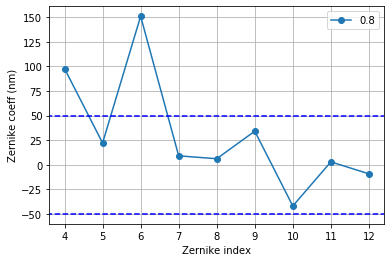

In [108]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

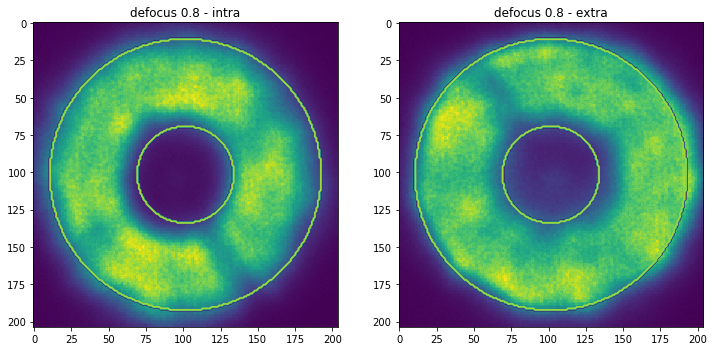

RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages


In [109]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [110]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=-0.02)

In [111]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [112]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031600127
extraImage expId for target: 2020031600128


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000127.yaml
AT_O_20200316_000127: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000127: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000127.yaml
AT_O_20200316_000127: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000127: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000128.yaml
AT_O_20200316_000128: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000128: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000128.yaml
AT_O_20200316_000128: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000128: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 18 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
Running source detection algorithm
RemoteTelemetry(ATDome, 0, position) falling behind; read 40 messag

In [113]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600127, 2020031600128, 10.513958280534716


Measured zernike coeficients: [-3.3891888759096993, 15.86377970285803, 23.218881424662882]
De-rotated zernike coeficients: [-0.4375419  16.21587694 23.21888142]
Hexapod offset: [ 0.00334001  0.12378532 -0.00552831]
Telescope offsets: [0.20040087 7.42711921 0.        ]

[ 23.21888142  23.72406804 110.46046768  -3.38918888  15.8637797
  31.51463816 -30.98290409   7.95670221   0.38633957]


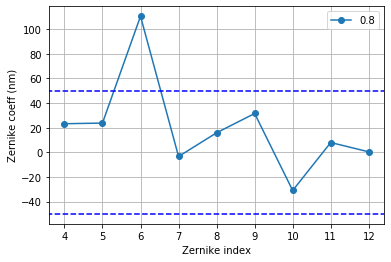

In [114]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

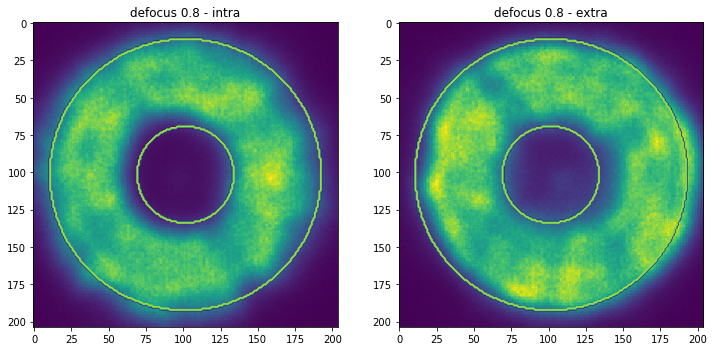

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 17 messages


In [115]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [116]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

Generating group_id
OBJECT 0001 - 0001


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015849953024 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015849953024 and this is thread id 140023838263104.
Exception ignore

[2020031600129]


In [117]:
cwfs.filter = "RG610"
cwfs.grating = "ronchi90lpmm"

In [118]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [119]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600130
extraImage expId for target: 2020031600131


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000130.yaml
AT_O_20200316_000130: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000130: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000130.yaml
AT_O_20200316_000130: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000130: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000131.yaml
AT_O_20200316_000131: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000131: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000131.yaml
AT_O_20200316_000131: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000131: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 17 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 26 messages
Running source detection algorithm
Remo

In [120]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600130, 2020031600131, 11.010792814939343


Measured zernike coeficients: [0.996758139571394, 26.565929168703097, 13.495861901371777]
De-rotated zernike coeficients: [ 6.05233949 25.88650819 13.4958619 ]
Hexapod offset: [-0.04620106  0.19760693 -0.0032133 ]
Telescope offsets: [-2.77206389 11.85641596  0.        ]

[ 13.4958619   34.44695431  95.49799203   0.99675814  26.56592917
  30.56926501 -21.79923553   8.21163938   3.14803955]


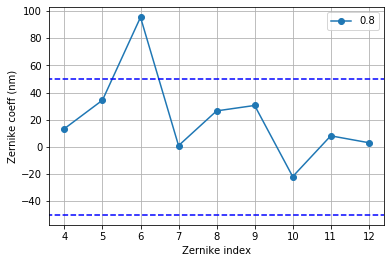

In [121]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

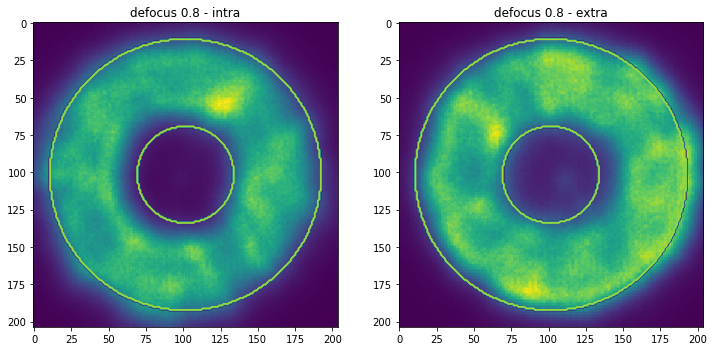

RemoteEvent(ATMCS, 0, target) falling behind; read 15 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 15 messages


In [122]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [123]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

Generating group_id
OBJECT 0001 - 0001
[2020031600132]
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 14 messages


In [124]:
await cwfs.attcs.offset_xy(x=25., y=0.)

Applying x/y offset: 25.0/ 0.0 
Applying Az/El offset: -24.51380050102137/ -4.906483974917724 
Waiting for telescope to settle.
Done


In [125]:
cwfs.filter = "quadnotch1"
cwfs.grating = "ronchi90lpmm"

RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages


In [126]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015849953024 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015849953024 and this is thread id 140023838263104.


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages


In [127]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600133
extraImage expId for target: 2020031600134


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000133.yaml
AT_O_20200316_000133: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000133: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000133.yaml
AT_O_20200316_000133: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000133: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000134.yaml
AT_O_20200316_000134: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000134: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000134.yaml
AT_O_20200316_000134: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000134: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
Running source detection algorithm
RemoteTelemetry(ATDome, 0, position) falling behind; read 38 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 11 messages
RemoteTel

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015833167616 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015833167616 and this is thread id 140023838263104.
Exception ignore

RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, measuredTorque) falling behind; read 13 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 63 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, measuredMotorVelocity) falling behind; read 14 messages
RemoteTelemetry(ATPneumatics, 0, m1AirPressure) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, azEl_mountMotorEncoders) falling behind; read 14 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 13 messages
Running CWFS code.
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 20 messages
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 14 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling b

In [128]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600133, 2020031600134, 11.577105557172764


Measured zernike coeficients: [-1.9195116897369044, 0.415628258903648, -11.133706537134096]
De-rotated zernike coeficients: [ -1.79704925   0.79239257 -11.13370654]
Hexapod offset: [0.01371793 0.0060488  0.00265088]
Telescope offsets: [0.82307599 0.36292789 0.        ]

[-11.13370654  48.76869641  88.9528078   -1.91951169   0.41562826
  13.13925782 -47.02082689   1.63650391  -6.86821911]


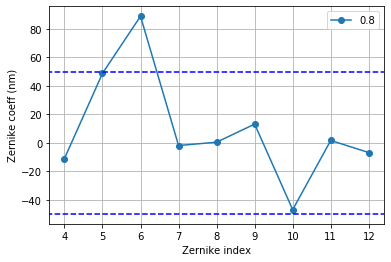

In [129]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

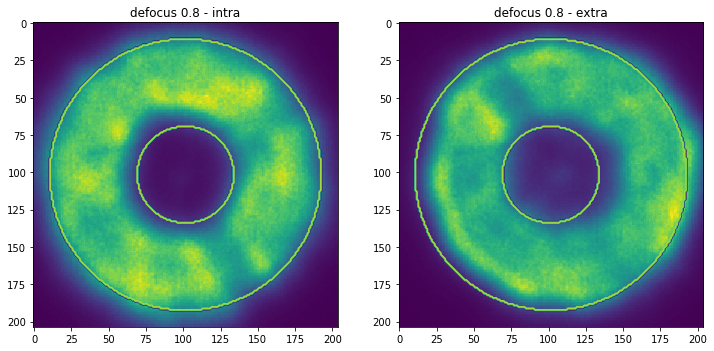

RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages


In [130]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [131]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

Generating group_id
OBJECT 0001 - 0001
[2020031600135]
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages


In [136]:
current_offsets = await cwfs.attcs.ataos.evt_correctionOffsets.aget()

In [137]:
current_offsets.z

-0.06440424174070358

In [134]:
offsets = np.linspace(-0.05, 0.05, 7)

In [144]:
exp_id = await cwfs.latiss.take_object(5.)

Generating group_id
OBJECT 0001 - 0001


In [145]:
for off in offsets:
#     print(off+current_offsets.z)
    cwfs.attcs.ataos.evt_correctionOffsets.flush()
    await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=off+current_offsets.z)
    await asyncio.sleep(5.)
    new_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
    print(new_offset.z)
    exp_id = await cwfs.latiss.take_object(5.)
    print(exp_id[0], new_offset.z)

cwfs.attcs.ataos.evt_correctionOffsets.flush()
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=off+current_offsets.z)
final_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
await asyncio.sleep(5.)
print(final_offset.z)

-0.11440424174070359
-0.11440423876047134
Generating group_id
OBJECT 0001 - 0001
2020031600137
-0.09773757507403692
-0.09773757308721542
Generating group_id
OBJECT 0001 - 0001
2020031600138
-0.08107090840737025
-0.0810709074139595
Generating group_id
OBJECT 0001 - 0001
2020031600139
-0.06440424174070358
-0.06440424174070358
Generating group_id
OBJECT 0001 - 0001
2020031600140
-0.04773757507403692
-0.04773757606744766
Generating group_id
OBJECT 0001 - 0001
2020031600141
-0.031070908407370257
-0.031070908531546593
Generating group_id
OBJECT 0001 - 0001
2020031600142
-0.01440424174070358
-0.014404241926968098
Generating group_id
OBJECT 0001 - 0001
2020031600143


TypeError: 'RemoteCommand' object is not callable

In [146]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=current_offsets.z)

In [147]:
exp_id = await cwfs.latiss.take_object(5.)
print(exp_id)

Generating group_id
OBJECT 0001 - 0001
[2020031600144]


In [148]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [149]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600145
extraImage expId for target: 2020031600146


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000145.yaml
AT_O_20200316_000145: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000145: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000145.yaml
AT_O_20200316_000145: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000145: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 19 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000146.yaml
AT_O_20200316_000146: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000146: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000146.yaml
AT_O_20200316_000146: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000146: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 42 messag

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140023838263104.
Exception ignore

In [ ]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [177]:
focus_hex_pos = 0.3174

In [178]:
hex_pos = [0.29188304663,
0.308631120848,
0.325352309796,
0.342077869183,
0.35880440353,
0.375529271655,
0.392257625344]

In [189]:
np.mean(hex_pos)

0.34207652099799996

In [185]:
focus_hex_pos-np.mean(hex_pos)

-0.02467652099799994

In [182]:
offsets

array([-0.05      , -0.03333333, -0.01666667,  0.        ,  0.01666667,
        0.03333333,  0.05      ])

In [172]:
focus_hex_pos-np.mean(hex_pos - offsets),

(-0.024676520997999996,)

In [186]:
-0.06440424174070358-0.02467652099799994

-0.08908076273870352

In [159]:
print(offsets)

[-0.05       -0.03333333 -0.01666667  0.          0.01666667  0.03333333
  0.05      ]


In [187]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=-0.09)

In [188]:
exp_id = await cwfs.latiss.take_object(5.)
print(exp_id)

Generating group_id
OBJECT 0001 - 0001
[2020031600151]
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


In [162]:
cwfs.filter = "empty_1"
cwfs.grating = "ronchi90lpmm"

In [190]:
current_offsets = await cwfs.attcs.ataos.evt_correctionOffsets.aget()

In [191]:
current_offsets.z

-0.09000000357627869

In [192]:
offsets = np.linspace(-0.05, 0.05, 13)

In [144]:
exp_id = await cwfs.latiss.take_object(5.)

Generating group_id
OBJECT 0001 - 0001


In [193]:
for off in offsets:
#     print(off+current_offsets.z)
    cwfs.attcs.ataos.evt_correctionOffsets.flush()
    await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=off+current_offsets.z)
    await asyncio.sleep(5.)
    new_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
    print(new_offset.z)
    exp_id = await cwfs.latiss.take_object(5., filter="empty_1", grating="ronchi90lpmm")
    print(exp_id[0], new_offset.z)

cwfs.attcs.ataos.evt_correctionOffsets.flush()
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=ocurrent_offsets.z)
final_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
await asyncio.sleep(5.)
print(final_offset.z)

-0.14000000059604645
Generating group_id
OBJECT 0001 - 0001
2020031600152 -0.14000000059604645
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
-0.13166667520999908
Generating group_id
OBJECT 0001 - 0001
2020031600153 -0.13166667520999908
-0.12333333492279053
Generating group_id
OBJECT 0001 - 0001
2020031600154 -0.12333333492279053
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 15 messages
-0.11500000208616257
Generating group_id
OBJECT 0001 - 0001
2020031600155 -0.11500000208616257
-0.1066666692495346
Generating group_id
OBJECT 0001 - 0001
2020031600156 -0.1066666692495346
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
-0.09833333641290665
Generating group_id
OBJECT 0001 - 0001
2020031600157 -0.09833333641290665
-0.09000000357627869
Generating group_id
OBJECT 0001 - 0001
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages


In [195]:
offsets+

array([-0.05      , -0.04166667, -0.03333333, -0.025     , -0.01666667,
       -0.00833333,  0.        ,  0.00833333,  0.01666667,  0.025     ,
        0.03333333,  0.04166667,  0.05      ])

In [197]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=current_offsets.z)

In [198]:
hex_pos = await cwfs.attcs.athexapod.evt_positionUpdate.aget()

In [208]:
0.34-hex_pos.positionZ

0.021691940303000035

In [205]:
offsets

array([-0.05      , -0.04166667, -0.03333333, -0.025     , -0.01666667,
       -0.00833333,  0.        ,  0.00833333,  0.01666667,  0.025     ,
        0.03333333,  0.04166667,  0.05      ])

In [210]:
current_offsets.z+0.021

-0.06900000357627868

In [211]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=-0.0690)

In [212]:
exp_id = await cwfs.latiss.take_object(5.)

Generating group_id
OBJECT 0001 - 0001


In [213]:
print(exp_id)

[2020031600165]


In [214]:
current_offsets = await cwfs.attcs.ataos.evt_correctionOffsets.aget()

In [215]:
current_offsets.z

-0.0689999982714653

In [216]:
offsets = np.linspace(-0.05, 0.05, 13)

In [144]:
exp_id = await cwfs.latiss.take_object(5.)

Generating group_id
OBJECT 0001 - 0001


In [218]:
for off in offsets:
#     print(off+current_offsets.z)
    cwfs.attcs.ataos.evt_correctionOffsets.flush()
    await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=off+current_offsets.z)
    await asyncio.sleep(5.)
    new_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
    print(new_offset.z)
    exp_id = await cwfs.latiss.take_object(5., filter="RG610", grating="ronchi90lpmm")
    print(exp_id[0], new_offset.z)

cwfs.attcs.ataos.evt_correctionOffsets.flush()
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=current_offsets.z)
final_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
await asyncio.sleep(5.)
print(final_offset.z)

-0.11899999529123306
Generating group_id
OBJECT 0001 - 0001
2020031600167 -0.11899999529123306
-0.1106666624546051
Generating group_id
OBJECT 0001 - 0001
2020031600168 -0.1106666624546051
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
-0.10233332961797714
Generating group_id
OBJECT 0001 - 0001
2020031600169 -0.10233332961797714
-0.09399999678134918
Generating group_id
OBJECT 0001 - 0001
2020031600170 -0.09399999678134918
-0.08566666394472122
Generating group_id
OBJECT 0001 - 0001
2020031600171 -0.08566666394472122
-0.07733333110809326
Generating group_id
OBJECT 0001 - 0001
2020031600172 -0.07733333110809326
-0.0689999982714653
Generating group_id
OBJECT 0001 - 0001
2020031600173 -0.0689999982714653
-0.06066666543483734
Generating group_id
OBJECT 0001 - 0001
2020031600174 -0.06066666543483734
-0.05233333259820938
Generating group_id
OBJECT 0001 - 0001
2020031600175 -0.05233333259820938
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 mess

NameError: name 'ocurrent_offsets' is not defined

In [219]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=current_offsets.z)

In [220]:
hex_pos = await cwfs.attcs.athexapod.evt_positionUpdate.aget()

In [221]:
0.33-hex_pos.positionZ

-0.0055840890189999826

In [222]:
current_offsets.z-0.0055840890189999826

-0.07458408729046528

In [223]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=-0.0746)

In [224]:
exp_id = await cwfs.latiss.take_object(20.)

Generating group_id
OBJECT 0001 - 0001


In [225]:
current_offsets = await cwfs.attcs.ataos.evt_correctionOffsets.aget()

In [226]:
current_offsets.z

-0.07460000365972519

In [228]:
offsets = np.linspace(-0.05, 0.05, 7)

In [144]:
exp_id = await cwfs.latiss.take_object(5.)

Generating group_id
OBJECT 0001 - 0001


In [229]:
for off in offsets:
#     print(off+current_offsets.z)
    cwfs.attcs.ataos.evt_correctionOffsets.flush()
    await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=off+current_offsets.z)
    await asyncio.sleep(5.)
    new_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
    print(new_offset.z)
    exp_id = await cwfs.latiss.take_object(5., filter="BG40", grating="ronchi90lpmm")
    print(exp_id[0], new_offset.z)

for off in offsets[::-1]:
#     print(off+current_offsets.z)
    cwfs.attcs.ataos.evt_correctionOffsets.flush()
    await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=off+current_offsets.z)
    await asyncio.sleep(5.)
    new_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
    print(new_offset.z)
    exp_id = await cwfs.latiss.take_object(5., filter="BG40", grating="ronchi90lpmm")
    print(exp_id[0], new_offset.z)


cwfs.attcs.ataos.evt_correctionOffsets.flush()
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis='z', offset=current_offsets.z)
final_offset = await cwfs.attcs.ataos.evt_correctionOffsets.next(flush=False, timeout=10.)
await asyncio.sleep(5.)
print(final_offset.z)

-0.12460000067949295
Generating group_id
OBJECT 0001 - 0001
2020031600181 -0.12460000067949295
-0.10793333500623703
Generating group_id
OBJECT 0001 - 0001
2020031600182 -0.10793333500623703
-0.09126666933298111
Generating group_id
OBJECT 0001 - 0001
2020031600183 -0.09126666933298111
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
-0.07460000365972519
Generating group_id
OBJECT 0001 - 0001
2020031600184 -0.07460000365972519
-0.05793333798646927
Generating group_id
OBJECT 0001 - 0001
2020031600185 -0.05793333798646927
-0.04126666858792305
Generating group_id
OBJECT 0001 - 0001
2020031600186 -0.04126666858792305
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 15 messages
-0.02460000291466713
Generating group_id
OBJECT 0001 - 0001
2020031600187 -0.02460000291466713
-0.02460000291466713
Generating group_id
OBJECT 0001 - 0001
2020031600188 -0.02460000291466713
-0.04126666858792305
Generating group_id
OBJECT 0001 - 0001
2020031600189 -0.041266668

In [233]:
await cwfs.attcs.enable()

Gathering settings.
No settings for atmcs.
Using                                                                                                                                 from settingVersions event.
No settings for atptg.
Couldn't get settingVersions event. Using empty settings.
No settings for ataos.
Using current from settingVersions event.
No settings for atpneumatics.
Using                                                                                                                                 from settingVersions event.
No settings for athexapod.
Using current from settingVersions event.
No settings for atdome.
Using test from settingVersions event.
No settings for atdometrajectory.
Using  from settingVersions event.
Settings versions: {'atmcs': '                                                                                                                               ', 'atptg': '', 'ataos': 'current', 'atpneumatics': '                                              

RuntimeError: Unable to ENABLE atptg


In [237]:
await cwfs.attcs.atptg.cmd_exitControl.start(timeout=5)

AckTimeoutError: msg='Timed out waiting for command acknowledgement', ackcmd=(ackcmd private_seqNum=590618961, ack=<SalRetCode.OK: 0>, error=0, result='')

In [240]:
await cwfs.attcs.atptg.cmd_enable.start()

In [241]:
await cwfs.attcs.atptg.cmd_pointLoadModel.set_start(pointingFile="at_20200314_fauto.mod")

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 20 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 52 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 17 messages


In [242]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [243]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600201
extraImage expId for target: 2020031600202


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000201.yaml
AT_O_20200316_000201: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000201: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000201.yaml
AT_O_20200316_000201: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000201: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 34 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 20 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000202.yaml
AT_O_20200316_000202: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000202: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000202.yaml
AT_O_20200316_000202: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000202: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
Running source detection algorithm
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 38 messag

In [244]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600201, 2020031600202, 93.36917532598076


Measured zernike coeficients: [18.61710235665602, 5.760167473069699, -121.81069749333948]
De-rotated zernike coeficients: [   4.6560971   -18.92344549 -121.81069749]
Hexapod offset: [-0.03554273 -0.14445378  0.02900255]
Telescope offsets: [-2.13256356 -8.66722694  0.        ]

[-121.81069749  -21.44497224 -214.91472504   18.61710236    5.76016747
   43.19646615   21.70435546    6.68391511    2.30093898]


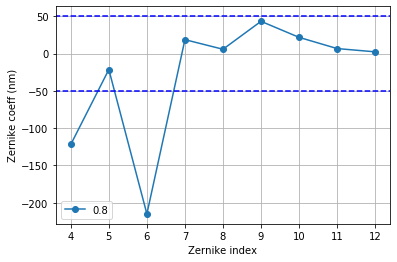

In [245]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [246]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=0.029)

In [252]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=0.036)

In [248]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [249]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
intraImage expId for target: 2020031600203
extraImage expId for target: 2020031600204


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000203.yaml
AT_O_20200316_000203: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000203: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000203.yaml
AT_O_20200316_000203: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000203: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 31 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000204.yaml
AT_O_20200316_000204: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000204: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000204.yaml
AT_O_20200316_000204: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000204: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 46 messages
RemoteTelemetry(ATPneumatics, 0, loadCell) falling behind; read 12 messag

Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015858345728 and this is thread id 140023838263104.
Exception ignore

Measured zernike coeficients: [1.7320804613451095, 10.06962943162704, -151.77875812299888]
De-rotated zernike coeficients: [   9.87058803   -2.63989234 -151.77875812]
Hexapod offset: [-0.075348   -0.02015185  0.0361378 ]
Telescope offsets: [-4.52088001 -1.20911099  0.        ]



In [250]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600203, 2020031600204, 95.21337319751822


Measured zernike coeficients: [1.7320804613451095, 10.06962943162704, -151.77875812299888]
De-rotated zernike coeficients: [   9.87058803   -2.63989234 -151.77875812]
Hexapod offset: [-0.075348   -0.02015185  0.0361378 ]
Telescope offsets: [-4.52088001 -1.20911099  0.        ]

[-151.77875812   -6.06566503  -87.89557787    1.73208046   10.06962943
   34.40923154   13.36325911   21.16510102   -1.49763352]


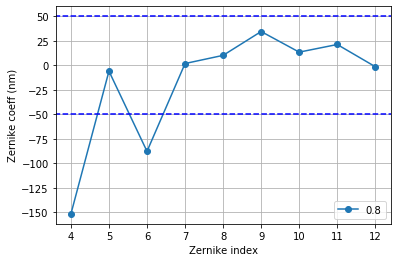

In [251]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [253]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [254]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031600205
extraImage expId for target: 2020031600206


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000205.yaml
AT_O_20200316_000205: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000205: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000205.yaml
AT_O_20200316_000205: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000205: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 19 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015954032384 and this is thread id 140015841560320.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015954032384 and this is thread id 140015841560320.


RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000206.yaml
AT_O_20200316_000206: Forcing detector serial to ITL-3800C-068
AT_O_20200316_000206: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200316_000206.yaml
AT_O_20200316_000206: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200316_000206: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 42 messages
Remo

In [255]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

2020031600205, 2020031600206, 97.08205210706322


Measured zernike coeficients: [-2.0031673111065755, 7.233369546205629, -3.1139969632254316]
De-rotated zernike coeficients: [ 7.42515508  1.09607772 -3.11399696]
Hexapod offset: [-0.05668057  0.00836701  0.00074143]
Telescope offsets: [-3.40083439  0.50202033  0.        ]

[ -3.11399696 -75.10370299 -79.31264525  -2.00316731   7.23336955
  19.00265628 -23.16473152  17.17376466  -0.71384233]


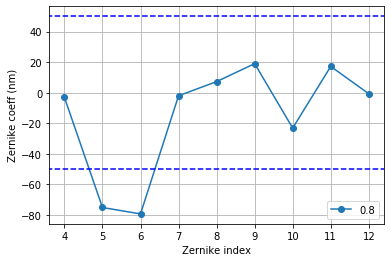

RemoteEvent(ATMCS, 0, target) falling behind; read 36 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 100 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f59c0578d40>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140015841560320 and this is thread id 140023838263104.


RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 64 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 11 messages
RemoteTelemetry(ATMCS, 0, nasymth_m3_mountMotorEncoders) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 15 messages
RemoteTelemetry(ATMCS, 0, mount_Nasmyth_Encoders) falling behind; read 11 messages
RemoteTelemetry(ATMCS, 0, mount_AzEl_Encoders) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, measuredMotorVelocity) falling behind; read 12 messages
RemoteTelemetry(ATMCS, 0, azEl_mountMotorEncoders) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 13 messages
Remot

In [256]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

# Basic process

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None
cwfs.angle = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
print(f"{cwfs.intra_visit_id}, {cwfs.extra_visit_id}, {cwfs.angle}")

In [ ]:
# print results
cwfs.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, cwfs.algo.zer4UpNm[:9], 'o-', label=f'{cwfs.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()
print(cwfs.algo.zer4UpNm[:9])

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.0, z=0.0)

In [ ]:
exp_id = await cwfs.latiss.take_object(20.)
cwfs.evt_logMessage.set_put(message="Focused image: {exp_id[0]}")
print(f"{exp_id}")

In [257]:
await cwfs.attcs.point_azel(target_name="Park position",
                                  az=cwfs.attcs.tel_park_az,
                                  el=cwfs.attcs.tel_park_el,
                                  wait_dome=False)

Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
[Telescope] delta Alt = +018.385 | delta Az= -168.253 delta N1 = +000.000 delta N2 = +029.795 
[Telescope] delta Alt = +018.025 | delta Az= -166.786 delta N1 = -000.000 delta N2 = +029.160 
[Telescope] delta Alt = +015.167 | delta Az= -160.830 delta N1 = +000.000 delta N2 = +026.721 
[Telescope] delta Alt = +009.789 | delta Az= -154.830 delta N1 = +000.000 delta N2 = +024.037 
[Telescope] delta Alt = +005.886 | delta Az= -150.830 delta N1 = +000.000 delta N2 = +018.807 
[Telescope] delta Alt = +001.500 | delta Az= -144.830 delta N1 = +000.000 delta N2 = +012.910 
[Telescope] delta Alt = +000.026 | delta Az= -138.830 delta N1 = +000.000 delta N2 = +007.386 
[Telesc

RuntimeError: atptg state is <State.DISABLED: 1>, expected <State.ENABLED: 2>

In [258]:
await cwfs.attcs.stop_tracking()

Stop tracking.
Mount tracking state is 8
In Position: True.
In Position: True.
In Position: False.


In [259]:
await cwfs.attcs.standby()

[atmcs]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atptg]::[<State.STANDBY: 5>]
[ataos]::[<State.STANDBY: 5>]
[atpneumatics]::[<State.STANDBY: 5>]
[athexapod]::[<State.STANDBY: 5>]
[atdome]::[<State.STANDBY: 5>]
[atdometrajectory]::[<State.STANDBY: 5>]
All components in standby.
